<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Data-and-Librarys" data-toc-modified-id="Loading-Data-and-Librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Data and Librarys</a></span></li><li><span><a href="#image-processing" data-toc-modified-id="image-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>image processing</a></span></li><li><span><a href="#model-building-using-train-data" data-toc-modified-id="model-building-using-train-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>model building using train data</a></span><ul class="toc-item"><li><span><a href="#train-test-split" data-toc-modified-id="train-test-split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>train test split</a></span></li><li><span><a href="#Feature-Extraction-/-Dimensionality-Reduction" data-toc-modified-id="Feature-Extraction-/-Dimensionality-Reduction-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Extraction / Dimensionality Reduction</a></span></li><li><span><a href="#Model-buiding-using-support-vector-machine(SVC)" data-toc-modified-id="Model-buiding-using-support-vector-machine(SVC)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Model buiding using support vector machine(SVC)</a></span></li><li><span><a href="#model-evaluation" data-toc-modified-id="model-evaluation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>model evaluation</a></span></li></ul></li><li><span><a href="#Hyper-parameter-tuning-and-cross-validation-using-train-data" data-toc-modified-id="Hyper-parameter-tuning-and-cross-validation-using-train-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyper-parameter tuning and cross validation using train data</a></span></li><li><span><a href="#Full-process-on-train-data-using-Pipeline" data-toc-modified-id="Full-process-on-train-data-using-Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Full process on train data using Pipeline</a></span></li><li><span><a href="#prediction-on-test-data-using-Pipeline" data-toc-modified-id="prediction-on-test-data-using-Pipeline-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>prediction on test data using Pipeline</a></span></li><li><span><a href="#kaggle-submission" data-toc-modified-id="kaggle-submission-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>kaggle submission</a></span></li></ul></div>

# Loading Data and Librarys

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('Datasets/digit_train.csv')
train_data.shape

(42000, 785)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df = train_data.copy()
train_df.shape

(42000, 785)

In [6]:
train_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
train_df.dropna(inplace=True)

In [10]:
train_df.shape

(42000, 785)

# image processing

In [11]:
# Each image is 28 pixels in height and 28 pixels in width
image = train_df.iloc[889].values[1:].reshape(28,28)
image.shape

(28, 28)

C:\Python310\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


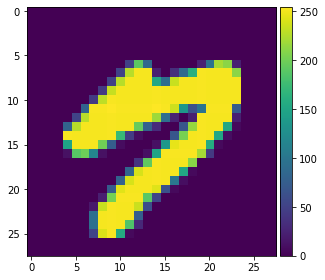

In [12]:
from skimage import io

io.imshow(image)

In [13]:
image.max()

255

# model building using train data

## train test split

In [15]:
images = train_df.drop(columns=['label']).values
label = train_df.label

In [16]:
images = images/255.0
images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
images.shape

(42000, 784)

In [17]:
images.max()

1.0

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(images, label, test_size=0.3, random_state=33)

In [19]:
print(xtrain.shape)
print(xtest.shape)

(29400, 784)
(12600, 784)


## Feature Extraction / Dimensionality Reduction

In [20]:
# Feature Extraction/Dimensionality Reduction using HOG(Histogram of Oriented Gradients)
from skimage import feature

transform = lambda image: feature.hog(image.reshape(28,28))
train_vector = np.array(list(map(transform , xtrain)))
test_vector = np.array(list(map(transform , xtest)))

In [21]:
print(train_vector.shape)
print(test_vector.shape)

(29400, 81)
(12600, 81)


## Model buiding using support vector machine(SVC)

In [22]:
from sklearn.svm import SVC

digit_recognizer = SVC()
digit_recognizer.fit(train_vector, ytrain)

SVC()

## model evaluation

In [23]:
ypred = digit_recognizer.predict(test_vector)

In [24]:
from sklearn.metrics import classification_report
report = classification_report(ytest, ypred)

In [25]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1247
           1       0.99      0.99      0.99      1455
           2       0.97      0.97      0.97      1244
           3       0.96      0.97      0.97      1321
           4       0.96      0.97      0.97      1221
           5       0.98      0.97      0.98      1133
           6       0.98      0.99      0.98      1245
           7       0.97      0.96      0.96      1317
           8       0.96      0.95      0.96      1206
           9       0.96      0.96      0.96      1211

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



# Hyper-parameter tuning and cross validation using train data

In [27]:
from sklearn.model_selection import RandomizedSearchCV

grid = RandomizedSearchCV(
    digit_recognizer,
    param_distributions={
        'C': np.arange(1.0, 100, 2),
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'degree': [3, 4, 5, 6, 7],
        'gamma': ['scale', 'auto'],
        'decision_function_shape': ['ovo', 'ovr']
    }, cv=10, scoring='accuracy', n_jobs=4, verbose=1)

In [28]:
feature_vector = np.array(list(map(transform, images)))
feature_vector.shape

(42000, 81)

In [30]:
label.shape

(42000,)

In [36]:
feature_vector.shape

(42000, 81)

In [31]:
grid.fit(feature_vector, label)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
       53., 55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77.,
       79., 81., 83., 85., 87., 89., 91., 93., 95., 97., 99.]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [3, 4, 5, 6, 7],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=1)

In [32]:
grid.best_score_

0.9762380952380951

In [33]:
grid.best_params_

{'kernel': 'poly',
 'gamma': 'scale',
 'degree': 6,
 'decision_function_shape': 'ovr',
 'C': 67.0}

In [34]:
grid.best_estimator_

SVC(C=67.0, degree=6, kernel='poly')

In [38]:
ypred = grid.predict(feature_vector)
report2 = classification_report(label, ypred)

In [39]:
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



# Full process on train data using Pipeline 

In [70]:
new_images = train_df.drop(columns=['label']).values
new_labels = train_df.label

function taken from
https://towardsdatascience.com/creating-custom-transformers-for-sklearn-pipelines-d3d51852ecc1

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# here BaseEstimator and TransformerMixin are classes
class PreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    # don't need this in this pipeline, there is no operation needed on y, that's why it is none 
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        return self
  
    def transform(self, X, y=None):
        transform = lambda image: feature.hog(image.reshape(28,28)/255.0)
        feature_vector = np.array(list(map(transform, X)))
        return feature_vector

In [72]:
# parameters of SVC are taken from grid.best_estimator_
pipeline = Pipeline([
    ('feature_extractor', PreProcessor()), 
    ('digit_recognizer', SVC(
        C=67.0, 
        degree=7, 
        kernel='poly',
        gamma='scale',
        decision_function_shape='ovr'
        )
    )
])

In [89]:
type(new_images)

numpy.ndarray

In [90]:
new_images.shape

(42000, 784)

In [91]:
new_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
print(type(new_labels))
print(new_labels.shape)

<class 'pandas.core.series.Series'>
(42000,)


In [102]:
new_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [73]:
pipeline.fit(new_images, new_labels)

Pipeline(steps=[('feature_extractor', PreProcessor()),
                ('digit_recognizer', SVC(C=67.0, degree=7, kernel='poly'))])

In [74]:
ypred = pipeline.predict(new_images)
report3 = classification_report(new_labels, ypred)

In [75]:
print(report3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



# prediction on test data using Pipeline

In [78]:
test_data = pd.read_csv('Datasets/digit_test.csv')
test_data.shape

(28000, 784)

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [82]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [92]:
test_images = test_data.values
test_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
test_images.shape

(28000, 784)

In [124]:
test_ypred = pipeline.predict(test_images)
test_ypred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [125]:
test_ypred.shape

(28000,)

# kaggle submission

In [137]:
ImageId_df = pd.DataFrame(np.zeros((28000)), columns=['col'])
ImageId_df.index = ImageId_df.index + 1
ImageId_df['ImageId'] = ImageId_df.index
ImageId_df.drop(columns='col',inplace=True)
ImageId_df

,ImageId
1,1
2,2
3,3
4,4
5,5
...,...
27996,27996
27997,27997
27998,27998
27999,27999


In [141]:
pred_df = pd.DataFrame(test_ypred, columns=['Label'])
pred_df.index = pred_df.index + 1
pred_df

,Label
1,2
2,0
3,9
4,0
5,3
...,...
27996,9
27997,7
27998,3
27999,9


In [143]:
# Create Sample Submission file 
submission_df = pd.concat([ImageId_df, pred_df], axis=1)
submission_df.to_csv('KaggleSubmissions/digitsubmission.csv', index=False)